# Unidad 9 - Computación III
Carrera Física Aplicada, INSPT UTN<br>
Daiana Dominikow. Septiembre 2024.

# PySerial: leer y almacenar datos de sensor Arduino.
<p style="background-color:rgba(255, 99, 71, 0.6);">Disclaimer: esto no funciona en Google Colab. Solo pueden utilizarlo localmente. Colab procesa en la nube, no en nuestra compu, por lo tanto no tiene manera de acceder a los puertos USB locales. Recomiendo utilizar VScode con la extensión de Jupyter Notebooks para este fin</p>


Al día de hoy deben estar ya familiarizados con nuestros amigos paquetes **Numpy**, **Pandas** y ***MatplotLib***, la santa trinidad del análisis de datos y la física computacional en Python.<br><br>
Hoy les vengo a recordar algo visto en Computación 2 y utilizado en tantas clases de Laboratorio de Física: la placa de Arduino.<br><br>
Recordarán también, que tomar datos con un sensor Arduino y guardarlos (en general) requería  de un trabajo manual y operativo de copiar lo impreso por serial y pegarlo en un archivo de texto. (Ojo, esto se puede automatizar con un módulo para tarjetas SD y una biblioteca hecha para tal fin, pero no disponemos de tales herramientas, y con Python podemos rabajar y luego analizar la data de manera mas sencilla).<br><br>

### Pequeña introducción, qué es el Serial?
<em> Spoiler: Haremos un repaso de Arduino en breves.</em><br><br>
Si tienen a mano código _C_ escrito durante la cursada de Compu 2, han de encontrar que utilizábamos un método 'Serial', inicializandolo como <em>Serial.begin(9600);</em> para imprimir por consola con el método <em>Serial.println(variable)</em> dentro del loop.<br><br>
El Serial en Arduino refiere a un puerto de comunicación, es un recurso utilizado para comunicar al Arduino y la computadora, un módulo, o incluso otro Arduino.<br> Podemos establecer comunicación con el microcontrolador a través de puertos USB, dispositivos bluetooth, etc, sabiendo cómo programar y configurar los puertos Serial de Arduino, así como recibir y ver los datos de la comunicación. <br>

<strong>PySerial</strong> es una biblioteca que permite conectarse a todos los puertos serial disponibles, con ella vamos a poder primero buscar en qué puerto está conectado nuestro Arduino. Con este dato, y el BAUD (los bits por segundo que transmite el microcontrolador al serial, en general son 300, 600, 1200, 2400, 4800, 9600, 14400, 19200, 28800, 38400, 57600, o 115200) podremos conectarnos con python a la placa y obtener los datos del sensor que le querramos poner.

In [1]:
#para instalar PySerial, ejecutamos
!pip install PySerial

Defaulting to user installation because normal site-packages is not writeable


Lo primero es entonces, importar la biblioteca

In [3]:
import serial #para leer la data del arduino uno
import numpy as np


Ahora, supongamos que quiero encontrar en qué puerto tengo conectada mi placa, a la que previamente le cargué un script que toma la info de un fotoreceptor que va a devolver un dato numérico entre 0 y 1023.

In [4]:
### para ver en que puerto tengo el sensor en cuestión
import serial.tools.list_ports

#esta es la versión facil, listar todos los puertos disponibles
ports = list(serial.tools.list_ports.comports())

for p in ports:
    print(p)

/dev/ttyS0 - n/a
/dev/ttyS1 - n/a
/dev/ttyS2 - n/a
/dev/ttyS3 - n/a
/dev/ttyS6 - n/a
/dev/ttyS7 - n/a
/dev/ttyS8 - n/a
/dev/ttyS9 - n/a
/dev/ttyS10 - n/a
/dev/ttyS11 - n/a
/dev/ttyS12 - n/a
/dev/ttyS13 - n/a
/dev/ttyS14 - n/a
/dev/ttyS15 - n/a
/dev/ttyS16 - n/a
/dev/ttyS17 - n/a
/dev/ttyS18 - n/a
/dev/ttyS19 - n/a
/dev/ttyS20 - n/a
/dev/ttyS21 - n/a
/dev/ttyS22 - n/a
/dev/ttyS23 - n/a
/dev/ttyS24 - n/a
/dev/ttyS25 - n/a
/dev/ttyS26 - n/a
/dev/ttyS27 - n/a
/dev/ttyS28 - n/a
/dev/ttyS29 - n/a
/dev/ttyS30 - n/a
/dev/ttyS31 - n/a
/dev/ttyS4 - n/a
/dev/ttyS5 - n/a
/dev/ttyACM0 - ttyACM0


Como observarán mas arriba, mi arduino esta en el puerto '/dev/cu.usbserial-2120' al momento de ejecutar este script. El gran problema de esta biblioteca está en que desde Google Colab no es util ya que no ejecuta localmente, por lo tanto no ve los puertos de la compu. PERO, PERO PERO, sabiendo en que puesto está previamente, puedo hacerlo.

In [30]:
#como conecto mi script jupyter a mi placa arduino?

puerto_arduino = '/dev/ttyACM0' #el puerto 
baud = 9600 #velocidad de comunicación entre la compu y el arduino

def conectar_arduino(puerto_arduino, baud):
    arduino = serial.Serial(port=puerto_arduino, baudrate=baud)  #inicializo la conexión
    print(f'Conectado exitosamente al puerto: {puerto_arduino} BAUD rate: {baud}')
    return arduino


Conectado exitosamente al puerto: /dev/ttyACM0 BAUD rate: 9600


In [74]:
arduino = conectar_arduino(puerto_arduino,baud)

Conectado exitosamente al puerto: /dev/ttyACM0 BAUD rate: 9600


In [71]:
#para cerrar la conexión
arduino.close()

### Leer información del Serial
<em>no se apuren, ya vamos a repasar Arduino, supongamos tenemos un sensor del año pasado armado</em>
Veamos que podría leer continuamente la info de arduino e imprimirla.

In [37]:
def read_sensor_data():
    data = arduino.readline().decode('utf-8').strip()
    print(f'leyendo info sensor: {int(data)}')
 
while True:
    read_sensor_data()


leyendo info sensor: 43
leyendo info sensor: 159
leyendo info sensor: 228
leyendo info sensor: 312
leyendo info sensor: 324
leyendo info sensor: 327
leyendo info sensor: 318
leyendo info sensor: 303
leyendo info sensor: 315
leyendo info sensor: 325
leyendo info sensor: 297
leyendo info sensor: 295
leyendo info sensor: 296
leyendo info sensor: 298
leyendo info sensor: 298
leyendo info sensor: 297
leyendo info sensor: 296
leyendo info sensor: 295
leyendo info sensor: 296
leyendo info sensor: 297
leyendo info sensor: 295
leyendo info sensor: 294
leyendo info sensor: 294
leyendo info sensor: 293
leyendo info sensor: 293
leyendo info sensor: 293
leyendo info sensor: 293
leyendo info sensor: 294
leyendo info sensor: 293
leyendo info sensor: 293
leyendo info sensor: 293
leyendo info sensor: 293
leyendo info sensor: 295
leyendo info sensor: 300
leyendo info sensor: 312
leyendo info sensor: 310
leyendo info sensor: 302
leyendo info sensor: 296
leyendo info sensor: 293
leyendo info sensor: 295
l

KeyboardInterrupt: 

Pero como vimos, si lo ejecutamos así como está, el loop no vá a cortar nunca.
Tenemos que acotarlo en el tiempo, la biblioteca time la vamos a utilizar para ver en qué momento arranca el script y definirle durante cuanto tiempo queremos que mida el tiempo

In [88]:
import time
t_end = time.time() + 5  #supongamos que quiero que corra mi script durante 5 segundos.

while time.time() < t_end:
    read_sensor_data()


leyendo info sensor: 294
leyendo info sensor: 300
leyendo info sensor: 301
leyendo info sensor: 301
leyendo info sensor: 300
leyendo info sensor: 300
leyendo info sensor: 324
leyendo info sensor: 302
leyendo info sensor: 302
leyendo info sensor: 305
leyendo info sensor: 304
leyendo info sensor: 303
leyendo info sensor: 311
leyendo info sensor: 300
leyendo info sensor: 303
leyendo info sensor: 316
leyendo info sensor: 297
leyendo info sensor: 298
leyendo info sensor: 299
leyendo info sensor: 300
leyendo info sensor: 297
leyendo info sensor: 303
leyendo info sensor: 298
leyendo info sensor: 299
leyendo info sensor: 300
leyendo info sensor: 326
leyendo info sensor: 340
leyendo info sensor: 338
leyendo info sensor: 320
leyendo info sensor: 327
leyendo info sensor: 320
leyendo info sensor: 317
leyendo info sensor: 316
leyendo info sensor: 317
leyendo info sensor: 320
leyendo info sensor: 310
leyendo info sensor: 315
leyendo info sensor: 314
leyendo info sensor: 335
leyendo info sensor: 320


### Leer la información del Serial y guardarla en un array numpy.
Esto es lo importante ya que si no guardamos la información muy dificilmente podamos trabajarla luego.

In [84]:
#inicializamos el array
def save_sensor_data():
    data = arduino.readline().decode('utf-8').strip()
    print(f"Guardando data sensor a las {time.strftime('%H:%M:%S')}: {data}")
    return data 

datos = np.array([])

t_end = time.time() + 10  #supongamos que quiero que corra mi script durante 5 segundos.

while time.time() < t_end:
    data = save_sensor_data()
    datos = np.append(datos, int(data))


Guardando data sensor a las 18:50:52: 295
Guardando data sensor a las 18:50:52: 295
Guardando data sensor a las 18:50:52: 298
Guardando data sensor a las 18:50:52: 300
Guardando data sensor a las 18:50:52: 299
Guardando data sensor a las 18:50:52: 299
Guardando data sensor a las 18:50:52: 296
Guardando data sensor a las 18:50:52: 296
Guardando data sensor a las 18:50:52: 66
Guardando data sensor a las 18:50:52: 40
Guardando data sensor a las 18:50:53: 39
Guardando data sensor a las 18:50:54: 246
Guardando data sensor a las 18:50:55: 224
Guardando data sensor a las 18:50:56: 174
Guardando data sensor a las 18:50:57: 77
Guardando data sensor a las 18:50:58: 54
Guardando data sensor a las 18:50:59: 85
Guardando data sensor a las 18:51:00: 34
Guardando data sensor a las 18:51:01: 191
Guardando data sensor a las 18:51:02: 47


Ahora si imprimo la info del sensor

In [85]:
print(datos)

[295. 295. 298. 300. 299. 299. 296. 296.  66.  40.  39. 246. 224. 174.
  77.  54.  85.  34. 191.  47.]


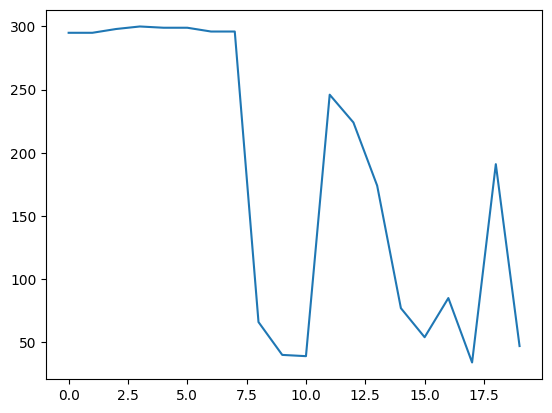

In [87]:
import matplotlib.pyplot as plt
plt.plot( [i for i in range (len(datos))],datos)